In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm, lognorm

# 粒度分布の関数形について

## モチベーション

以下の2論文（ほぼ同じ内容）に記載される粒度分布の関数近似について、以前から気になっていたので少し考えてみました。

 - [Muhammad SULAIMAN, 堤 大三, 藤田 正治, Classification of Grain Size Distribution Curves of Bed Material and the Porosity, 京都大学防災研究所年報, 2006](https://repository.kulib.kyoto-u.ac.jp/dspace/bitstream/2433/73290/1/a50b0p64.pdf)
 - [Muhammad SULAIMAN, Daizo TSUTSUMI, Masaharu FUJITA, POROSITY OF SEDIMENT MIXTURES WITH DIFFERENT TYPE OF GRAIN SIZE DISTRIBUTION, 水工学論文集, 2007](https://www.jstage.jst.go.jp/article/prohe1990/51/0/51_0_133/_pdf/-char/en)
 
気になっていることは、粒度分布の関数形の一つとして論文に示されるTalbot型ですが、河床材料の場合、分級作用が働くため、平衡状態では必ずLog-normal型になるのではという点です。

少しだけ考えてみたのでまとめておきます。


##  本論文に関する予備知識

流砂水理の研究者なら知っていて当然ですが、一応整理しておきます。

本論文は、京都大学の藤田正治先生の研究チームがまとめた河床材料の粒度分布と空隙率の関係に関するシリーズの一部になります。
代表的な論文を整理しておきます。

 - [堤 大三, 藤田 正治, Sulaiman Muhammad, 混合砂礫河床材料の空隙に関する シミュレーションモデル, 水工学論文集, 2006, 50 巻](https://www.jstage.jst.go.jp/article/prohe1990/50/0/50_0_1021/_pdf/-char/ja)
 
この論文が最初の成果で粒径を球と仮定して数値実験により空隙率と粒度分布の関係をまとめています。

 - [Muhammad SULAIMAN, 堤 大三, 藤田 正治, Classification of Grain Size Distribution Curves of Bed Material and the Porosity, 京都大学防災研究所年報, 2006](https://repository.kulib.kyoto-u.ac.jp/dspace/bitstream/2433/73290/1/a50b0p64.pdf)
 - [Muhammad SULAIMAN, Daizo TSUTSUMI, Masaharu FUJITA, POROSITY OF SEDIMENT MIXTURES WITH DIFFERENT TYPE OF GRAIN SIZE DISTRIBUTION, 水工学論文集, 2007](https://www.jstage.jst.go.jp/article/prohe1990/51/0/51_0_133/_pdf/-char/en)

次が前述の論文で、実河川の粒度分布について近似関数を用いて分類し、関数形ごとの空隙率の特性をまとめています。

 - [藤田正治，Muhammad SULAIMAN，Jazaul IKHSAN，堤大三, 河床材料の空隙率の変化を考慮した河床変動モデルとその適用, 河川技術論文集, 2008](http://library.jsce.or.jp/jsce/open/00906/2008/14-0013.pdf)
 
これまでに得られた粒度分布と空隙率の関係を用いて、一次元河床変動モデルを構築して数値実験を行っております。結論としてはなかなか難しいよねくらいの感じです。

一応、ここまでで研究は終わっているのですが、後に株式会社 建設技術研究所 岩見さんが発展させた研究を行っています。

 - [岩見 収二, 細井 寛昭, 藤田 正治, 現地河川への適用を考慮した空隙率の変化を反映した河床変動計算, 河川技術論文集, 2015, 21 巻](https://www.jstage.jst.go.jp/article/river/21/0/21_143/_pdf/-char/ja)
 - [岩見 収二, 細井 寛昭, 藤田 正治, 空隙率変化を考慮した平面二次元河床変動モデルによる空隙率空間分布の算定, 土木学会論文集B1（水工学）, 2017, 73 巻](https://www.jstage.jst.go.jp/article/jscejhe/73/4/73_I_925/_pdf/-char/ja)
 - [岩見 収二, 藤田 正治, 石礫河床の空隙に細粒土砂が充填される場に対する連続した粒度を考慮した河床変動モデルの開発, 土木学会論文集B1（水工学）, 2017, 73 巻](https://www.jstage.jst.go.jp/article/jscejhe/73/4/73_I_919/_pdf/-char/ja)
 - [岩見 収二, 藤田 正治, 連続した粒度の河床における礫の遮蔽効果と空隙率変化を考慮した河床変動モデル, 土木学会論文集B1（水工学）, 2018, 74 巻](https://www.jstage.jst.go.jp/article/jscejhe/74/5/74_I_1141/_pdf/-char/ja)
 - [岩見 収二, 藤田 正治, 露出礫の遮蔽効果と空隙率変化を考慮した河床変動モデルの現地土砂給砂実験への適用, 土木学会論文集B1（水工学）, 2020, 76 巻](https://www.jstage.jst.go.jp/article/jscejhe/76/2/76_I_1147/_pdf/-char/ja)
 
全てはフォローできていませんが現時点では空隙率の変化を考慮した平面二次元河床変動計算を行っているようです。

以上が関連論文の整理になります。

## 著者の粒度分布の型の分類と疑問 

論文には以下のように示されています。

> Riverbed materials have a variety of different characteristic size of bed surface sediment (Bunte and Abt, 2001), but the grain size distribution could be classified into some types. One of the most typical density functions of grain size is a log-normal distribution. The grain size distribution of bed material in most sand-bed streams is unimodal and that in many gravel-bed rivers is bimodal (Parker, 2004). Also in mountainous rivers, the surface bed material has usually Talbot distribution of grain size (Tatsuzawa et al., 1998).

> 河床材料は、様々な特性を持つ粒径（Bunte and Abt, 2001）を持ちますが、粒径分布はいくつかのタイプに分類することができます。粒径の最も典型的な密度関数の一つは対数正規分布です。ほとんどの砂床河川の河床材料の粒径分布は単峰性で多くの礫床河川では双峰性(bimodal)です（Parker, 2004）。また、山地河川では、表面の河床材料は通常、粒径のタルボット分布を持っています（Tatsuzawa et al., 1998）。

のなかで「山地河川では、表面の河床材料は通常、粒径のタルボット分布を持っています。」部分が引っかかっています。
山地河川でも分級作用があるので、対数正規分布になるのでは？と思っています。

参照文献の

[竜澤 宏昌, 林 日出喜, 長谷川 和義 : 渓流河川における河床砂礫の混合特性と階段状河床形の形状特性, 水工学論文集42巻, 1998](https://www.jstage.jst.go.jp/article/prohe1990/42/0/42_0_1075/_pdf)

をみると、渓流河川の粒度分布はTalbot型関数で表現できるとありますが、分級機構については十分に検討されていません。



## 実河川の粒度分布での検証

### 対象とする粒度分布

ある沖積河川上流域の比較的急流な礫床河川の粒度分布を対象とします。
表層を剥いだ下層、いわゆる交換層の粒度分布になります。

粒度分布をみると最大粒径が100mmとなっていますが、これは材料採取の際に100mm以上を採取していないため?でしょうか。

この粒度分布を対象に各種関数でフィッティングしていきます。

In [2]:
d = np.array([100,75,53,37.5,26.5,19,9.5,4.75,2,0.85,0.425,0.25,0.106,0.075,0.053])
p = np.array([100,94.6,77.9,68,55.9,49.2,37.2,30.1,23.1,14.3,6.4,2.8,0.7,0.5,0])
d = d[::-1]
p = p[::-1]

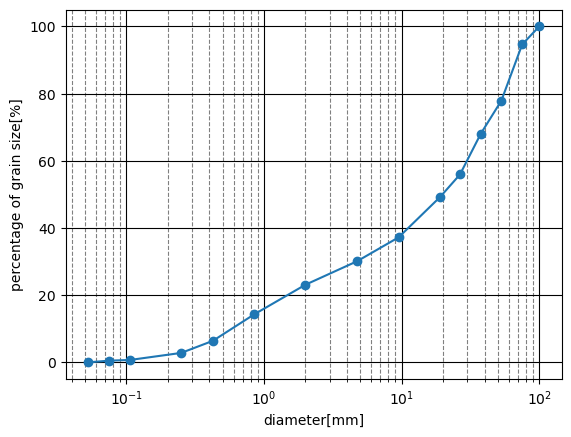

In [3]:
%matplotlib inline
fig, ax = plt.subplots()

ax.plot(d, p, marker='o')
ax.set_xscale('log')
ax.grid(which='major',color='black',linestyle='-')
ax.grid(which='minor',color='gray',linestyle='--')
ax.set_xlabel('diameter[mm]')
ax.set_ylabel('percentage of grain size[%]')

plt.show()

### 対数正規分布型関数によるフィッティング


対数正規分布の確率密度関数は以下に定義される。

$$
\begin{align}
f(x) = \frac{1}{\sqrt{2\pi}\sigma x} \exp\left(-\frac{(\log x - \mu)^2}{2\sigma^2}\right)
\end{align}
$$

ここに、$\mu$:期待値、$\sigma$：標準偏差とする。


また、対数正規分布の累積分布関数は以下に定義される。

$$
\begin{align}
F(x) = \frac{1}{2} \operatorname{erfc} \left(-\frac{\ln x - \mu}{\sqrt{2}\sigma}\right)
\end{align}
$$

ここに、$\operatorname{erfc}(x)$は相補誤差関数を表す。

これらより、$\mu、\sigma$の2パラメータでフィッティングする。

面倒なので、[scipy.stats.lognorm](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.lognorm.html)を使います。

引数の定義が正規分布の場合と異なるのでわからない方は以下を参照下さい。

 - https://analytics-note.xyz/statistics/scipy-lognorm/
 - https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.lognorm.html

フィッティング結果は次図のとおりです。

粒度分布が複雑な形状なので、粗めの成分でフィッティングする場合と細かめの成分でフィッティングする場合の2ケースが考えられます。
言い換えると対数正規分布でのフィッティングが難しいと考えられます。
bimodal型に近いかもしれませんね。フィッティングする場合は、対数正規分布の重ね合わせでできそうです。後日やってみます。

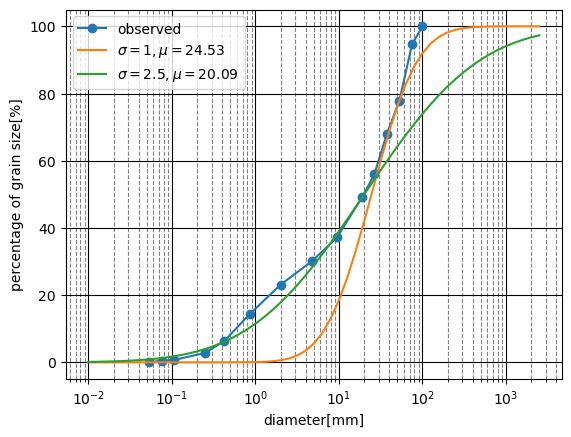

In [4]:
%matplotlib inline

fig, ax = plt.subplots()

ax.plot(d, p, marker='o', label='observed')

xd = np.arange(-2, 3.5, 0.1)
y = lognorm.cdf(10**xd, s=1, scale=np.exp(3.2), loc=0)
ax.plot(10**xd, y*100, label="$\sigma=1, \mu=24.53$")

y = lognorm.cdf(10**xd, s=2.5, scale=np.exp(3), loc=0)
ax.plot(10**xd, y*100, label="$\sigma=2.5, \mu=20.09$")

ax.set_xscale('log')
ax.grid(which='major',color='black',linestyle='-')
ax.grid(which='minor',color='gray',linestyle='--')
ax.set_xlabel('diameter[mm]')
ax.set_ylabel('percentage of grain size[%]')
ax.legend()

plt.show()

### Talbot型関数によるフィッティング

そもそものTalbot型の粒度分布について簡単にまとめておきます。

フラー(W.B.Fuller)とトンプソン(S.E.Thompson)によって確立された(1907)、粒子を最密充填にするための粒度分布曲線(Fuller曲線)が次式で示されます。
最大密度を与える理想粒度としてコンクリート骨材分野で提案された式らしいです。

$$
\begin{align}
f(x) = \sqrt{\frac{x}{d_{max}}}
\end{align}
$$

上式の一般形が下式のTalbot式になります。(1923)

$$
\begin{align}
f(x) = \left(\frac{x}{d_{max}}\right)^n
\end{align}
$$

著者は河床材料にフィッティングしやすいようにTalbot式を以下のように修正しています。

$$
\begin{align}
f(x) = \left(\frac{\log{x}-\log{d_{min}}}{\log{d_{max}}-\log{d_{min}}}\right)^{n_T}    :   n_T>1
\end{align}
$$

この式を使ってフィッティングしていきます。パラメータは$n_T$のみです。

参考文献

[福本武明, 土の連続型粒度式, 土木学会論文集1994](http://library.jsce.or.jp/jsce/open/00037/493/493-122068.pdf)

フィッティング結果は次図のとおりです。

指数を調整するだけでは、良くフィッティングできています。
これだけフィットすること考えると、Talbot型の粒度分布が形成される物理的要因がありそうです。


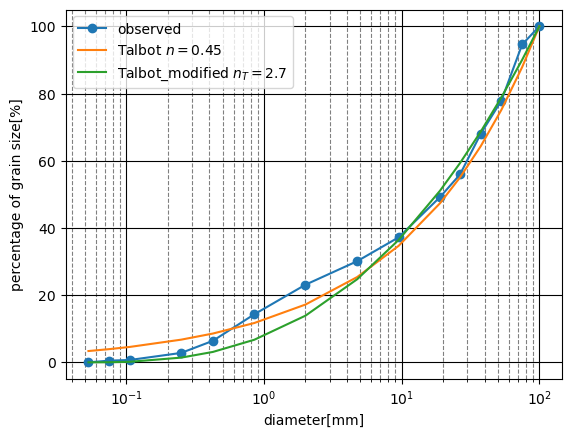

In [5]:
%matplotlib inline

n = 0.45
f = (d/d[-1])**n

nt = 2.7
ft = ((np.log10(d)-np.log10(d[0]))/(np.log10(d[-1])-np.log10(d[0])))**nt

fig, ax = plt.subplots()
ax.plot(d, p, marker='o', label='observed')
ax.plot(d, f*100, label='Talbot $n=0.45$')
ax.plot(d, ft*100, label='Talbot_modified $n_T=2.7$')
ax.set_xscale('log')
ax.grid(which='major',color='black',linestyle='-')
ax.grid(which='minor',color='gray',linestyle='--')
ax.set_xlabel('diameter[mm]')
ax.set_ylabel('percentage of grain size[%]')
ax.legend()
plt.show()

## まとめ

 - 実河川の河床材料をみても、Talbot型の粒度分布は存在しそう。
 - Talbot型の粒度分布が形成される要因については不明である。出水時には常に全粒径が動くとか？
 - 数値実験をやって検証しようと思います。